## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.389151  1.427184  0.396323  1.070748 -0.763759 -0.176905
1  1.124376 -0.234705  0.791877 -1.756887 -0.837235 -0.560975
2  0.145531 -1.481215 -0.510086  0.774071 -0.892599 -0.953896
3  1.596592  1.577308 -1.109219  0.038032  0.032299 -0.775381
4 -1.088554 -0.654338  1.719708 -1.040637  0.148603 -0.629882


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0256064	total: 56.7ms	remaining: 56.7s
1:	learn: 1.0167890	total: 57.3ms	remaining: 28.6s
2:	learn: 1.0074779	total: 58.1ms	remaining: 19.3s
3:	learn: 0.9964760	total: 58.7ms	remaining: 14.6s
4:	learn: 0.9869737	total: 59.4ms	remaining: 11.8s
5:	learn: 0.9775043	total: 59.8ms	remaining: 9.91s
6:	learn: 0.9664179	total: 60.4ms	remaining: 8.57s
7:	learn: 0.9573453	total: 60.9ms	remaining: 7.55s
8:	learn: 0.9487526	total: 61.4ms	remaining: 6.76s
9:	learn: 0.9383680	total: 61.9ms	remaining: 6.13s
10:	learn: 0.9294766	total: 62.5ms	remaining: 5.62s
11:	learn: 0.9198757	total: 62.9ms	remaining: 5.18s
12:	learn: 0.9108165	total: 63.4ms	remaining: 4.81s
13:	learn: 0.9039485	total: 63.7ms	remaining: 4.49s
14:	learn: 0.8959742	total: 64.2ms	remaining: 4.21s
15:	learn: 0.8883274	total: 64.7ms	remaining: 3.98s
16:	learn: 0.8812427	total: 65.2ms	remaining: 3.77s
17:	learn: 0.8720952	total: 65.7ms	remaining: 3.58s
18:	learn: 0.8649084	total: 66.1ms	remaining

103:	learn: 0.4400015	total: 109ms	remaining: 936ms
104:	learn: 0.4370211	total: 109ms	remaining: 930ms
105:	learn: 0.4333886	total: 110ms	remaining: 926ms
106:	learn: 0.4288596	total: 110ms	remaining: 921ms
107:	learn: 0.4256224	total: 111ms	remaining: 917ms
108:	learn: 0.4224990	total: 111ms	remaining: 910ms
109:	learn: 0.4192806	total: 112ms	remaining: 904ms
110:	learn: 0.4167322	total: 112ms	remaining: 898ms
111:	learn: 0.4141097	total: 113ms	remaining: 893ms
112:	learn: 0.4111937	total: 113ms	remaining: 888ms
113:	learn: 0.4087712	total: 114ms	remaining: 883ms
114:	learn: 0.4054257	total: 114ms	remaining: 877ms
115:	learn: 0.4022013	total: 115ms	remaining: 873ms
116:	learn: 0.3992029	total: 115ms	remaining: 868ms
117:	learn: 0.3971172	total: 116ms	remaining: 864ms
118:	learn: 0.3945344	total: 116ms	remaining: 860ms
119:	learn: 0.3913416	total: 117ms	remaining: 855ms
120:	learn: 0.3884183	total: 117ms	remaining: 851ms
121:	learn: 0.3857858	total: 118ms	remaining: 848ms
122:	learn: 

267:	learn: 0.1517982	total: 187ms	remaining: 510ms
268:	learn: 0.1513274	total: 187ms	remaining: 509ms
269:	learn: 0.1507822	total: 188ms	remaining: 507ms
270:	learn: 0.1496785	total: 188ms	remaining: 506ms
271:	learn: 0.1491660	total: 189ms	remaining: 505ms
272:	learn: 0.1487651	total: 189ms	remaining: 503ms
273:	learn: 0.1480933	total: 189ms	remaining: 502ms
274:	learn: 0.1469634	total: 190ms	remaining: 501ms
275:	learn: 0.1461308	total: 190ms	remaining: 500ms
276:	learn: 0.1448278	total: 191ms	remaining: 498ms
277:	learn: 0.1437502	total: 191ms	remaining: 497ms
278:	learn: 0.1431725	total: 192ms	remaining: 496ms
279:	learn: 0.1427564	total: 192ms	remaining: 495ms
280:	learn: 0.1423114	total: 193ms	remaining: 494ms
281:	learn: 0.1412165	total: 193ms	remaining: 493ms
282:	learn: 0.1401485	total: 194ms	remaining: 491ms
283:	learn: 0.1398569	total: 195ms	remaining: 490ms
284:	learn: 0.1388280	total: 195ms	remaining: 489ms
285:	learn: 0.1383497	total: 196ms	remaining: 489ms
286:	learn: 

493:	learn: 0.0474561	total: 293ms	remaining: 300ms
494:	learn: 0.0471754	total: 294ms	remaining: 299ms
495:	learn: 0.0469014	total: 294ms	remaining: 299ms
496:	learn: 0.0465835	total: 295ms	remaining: 298ms
497:	learn: 0.0463121	total: 295ms	remaining: 297ms
498:	learn: 0.0460469	total: 295ms	remaining: 297ms
499:	learn: 0.0457396	total: 296ms	remaining: 296ms
500:	learn: 0.0454779	total: 296ms	remaining: 295ms
501:	learn: 0.0452212	total: 297ms	remaining: 295ms
502:	learn: 0.0450022	total: 297ms	remaining: 294ms
503:	learn: 0.0446307	total: 298ms	remaining: 293ms
504:	learn: 0.0443678	total: 298ms	remaining: 292ms
505:	learn: 0.0440255	total: 299ms	remaining: 291ms
506:	learn: 0.0437798	total: 299ms	remaining: 291ms
507:	learn: 0.0435727	total: 299ms	remaining: 290ms
508:	learn: 0.0432174	total: 300ms	remaining: 289ms
509:	learn: 0.0428691	total: 300ms	remaining: 289ms
510:	learn: 0.0427186	total: 301ms	remaining: 288ms
511:	learn: 0.0423984	total: 301ms	remaining: 287ms
512:	learn: 

659:	learn: 0.0227530	total: 371ms	remaining: 191ms
660:	learn: 0.0226400	total: 371ms	remaining: 191ms
661:	learn: 0.0225287	total: 372ms	remaining: 190ms
662:	learn: 0.0224305	total: 372ms	remaining: 189ms
663:	learn: 0.0223212	total: 373ms	remaining: 189ms
664:	learn: 0.0222249	total: 373ms	remaining: 188ms
665:	learn: 0.0221175	total: 374ms	remaining: 187ms
666:	learn: 0.0220232	total: 374ms	remaining: 187ms
667:	learn: 0.0219176	total: 374ms	remaining: 186ms
668:	learn: 0.0217977	total: 375ms	remaining: 185ms
669:	learn: 0.0217055	total: 375ms	remaining: 185ms
670:	learn: 0.0216032	total: 376ms	remaining: 184ms
671:	learn: 0.0215322	total: 376ms	remaining: 184ms
672:	learn: 0.0214151	total: 377ms	remaining: 183ms
673:	learn: 0.0213258	total: 377ms	remaining: 183ms
674:	learn: 0.0212270	total: 378ms	remaining: 182ms
675:	learn: 0.0211585	total: 378ms	remaining: 181ms
676:	learn: 0.0210909	total: 379ms	remaining: 181ms
677:	learn: 0.0209783	total: 379ms	remaining: 180ms
678:	learn: 

874:	learn: 0.0110001	total: 476ms	remaining: 68ms
875:	learn: 0.0109576	total: 477ms	remaining: 67.5ms
876:	learn: 0.0109174	total: 478ms	remaining: 67ms
877:	learn: 0.0108945	total: 478ms	remaining: 66.4ms
878:	learn: 0.0108434	total: 478ms	remaining: 65.8ms
879:	learn: 0.0107954	total: 479ms	remaining: 65.3ms
880:	learn: 0.0107484	total: 479ms	remaining: 64.7ms
881:	learn: 0.0107010	total: 480ms	remaining: 64.2ms
882:	learn: 0.0106600	total: 480ms	remaining: 63.6ms
883:	learn: 0.0106213	total: 481ms	remaining: 63.1ms
884:	learn: 0.0105854	total: 481ms	remaining: 62.5ms
885:	learn: 0.0105402	total: 481ms	remaining: 61.9ms
886:	learn: 0.0105135	total: 482ms	remaining: 61.4ms
887:	learn: 0.0104709	total: 482ms	remaining: 60.8ms
888:	learn: 0.0104317	total: 483ms	remaining: 60.2ms
889:	learn: 0.0103883	total: 483ms	remaining: 59.7ms
890:	learn: 0.0103349	total: 483ms	remaining: 59.1ms
891:	learn: 0.0102982	total: 484ms	remaining: 58.6ms
892:	learn: 0.0102552	total: 484ms	remaining: 58ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

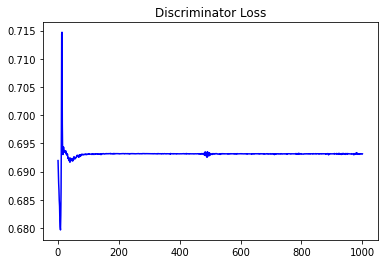

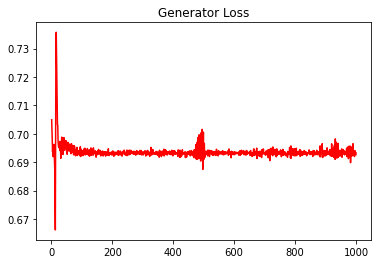

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10677091532415013


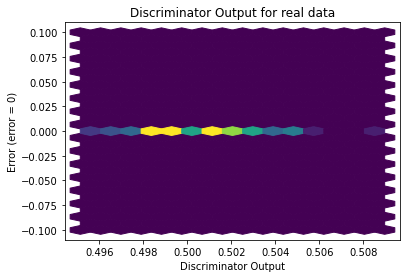

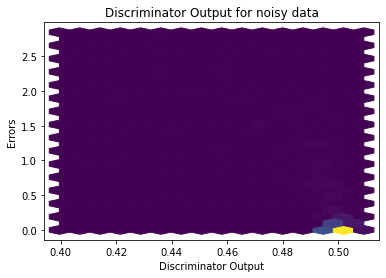

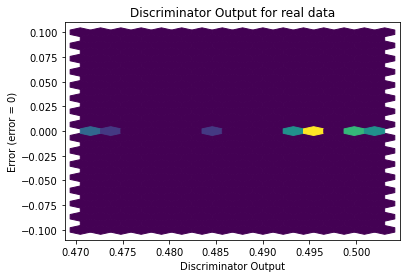

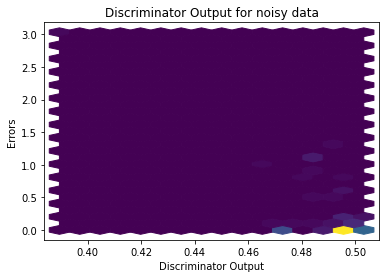

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


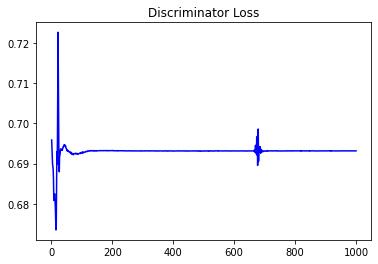

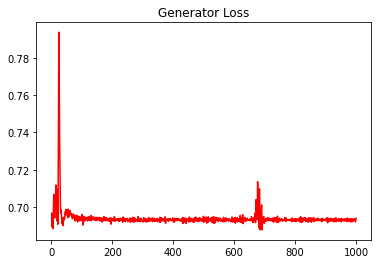

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09976580470860587


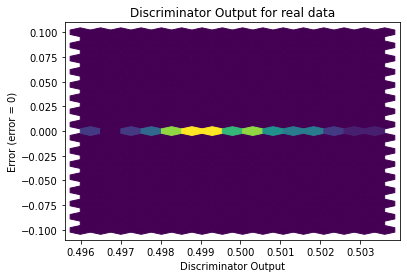

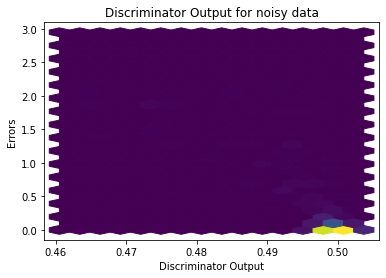

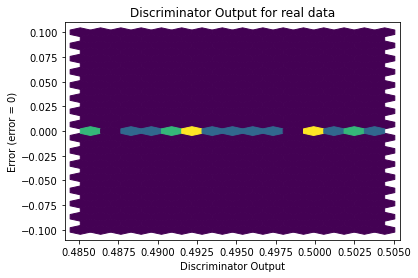

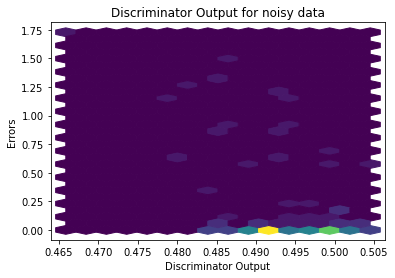

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5465]], requires_grad=True)
